In [166]:
import pandas as pd
from pathlib import Path as PPath

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import plotly.graph_objects as go

In [4]:
import ast

In [5]:
PATH = './experiments/'

In [60]:
%matplotlib inline

# Functions

In [104]:
test_str  = '[704.7250945293949, 0, 0.0, 0.0, 30, 5.522710477581892]'
function(test_str)

'feasible'

In [190]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 0: # Hit obstacle (fit_obs) (max 1 hit)
        return 'infeasible'
    
    elif x[0] > 2: # Away from destination wp (fit_d) (max 2 meters)
        return 'verify'
    
    else:
        return 'feasible'

In [191]:
pathlist = PPath(PATH).glob("**/mode_A*_exec_1_*.csv")

for i, p in enumerate(pathlist):
    print(p)
    
print('Qty: ', i+1)

experiments/mode_A/map_30/mode_A_map_30_exec_1_history.csv
experiments/mode_A/map_29/mode_A_map_29_exec_1_history.csv
experiments/mode_A/map_07/mode_A_map_07_exec_1_history.csv
experiments/mode_A/map_06/mode_A_map_06_exec_1_history.csv
experiments/mode_A/map_36/mode_A_map_36_exec_1_history.csv
experiments/mode_A/map_05/mode_A_map_05_exec_1_history.csv
experiments/mode_A/map_15/mode_A_map_15_exec_1_history.csv
experiments/mode_A/map_00/mode_A_map_00_exec_1_history.csv
experiments/mode_A/map_01/mode_A_map_01_exec_1_history.csv
experiments/mode_A/map_41/mode_A_map_41_exec_1_history.csv
experiments/mode_A/map_03/mode_A_map_03_exec_1_history.csv
experiments/mode_A/map_27/mode_A_map_27_exec_1_history.csv
experiments/mode_A/map_43/mode_A_map_43_exec_1_history.csv
experiments/mode_A/map_40/mode_A_map_40_exec_1_history.csv
experiments/mode_A/map_10/mode_A_map_10_exec_1_history.csv
experiments/mode_A/map_21/mode_A_map_21_exec_1_history.csv
experiments/mode_A/map_14/mode_A_map_14_exec_1_history.c

In [214]:
pathlist = PPath(PATH).glob("**/mode_G*_exec_1_*.csv")

quantity_feasibility = []

for path in pathlist:
    df = pd.read_csv(path)
    
    df['label'] = df['fitness_trace'].apply(lambda x: function(x))
    
    quantity_feasibility.append({
        'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
        'qty_verify': df.loc[df['label']=='verify'].shape[0],
        'qty_feasible': df.loc[df['label']=='feasible'].shape[0],
        'best': df[df.fitness == df.fitness.min()].iloc[0]['label']
    })


[]

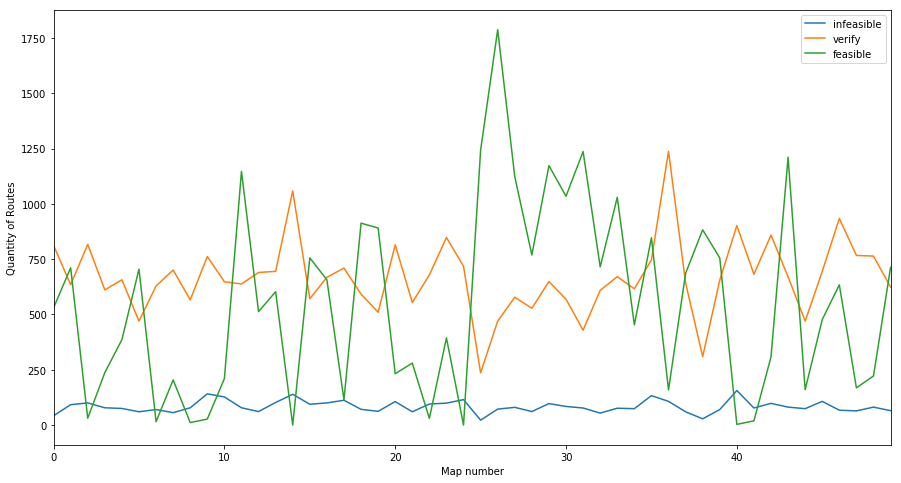

In [215]:
quantity_feasibility_df = pd.DataFrame(quantity_feasibility)
ax = quantity_feasibility_df.plot(figsize=(15,8))
ax.legend(['infeasible', 'verify', 'feasible'])
ax.set_xlabel('Map number')
ax.set_ylabel('Quantity of Routes')
ax.plot()
# mode__exec_1_category_routes

Text(0, 0.5, 'Category')

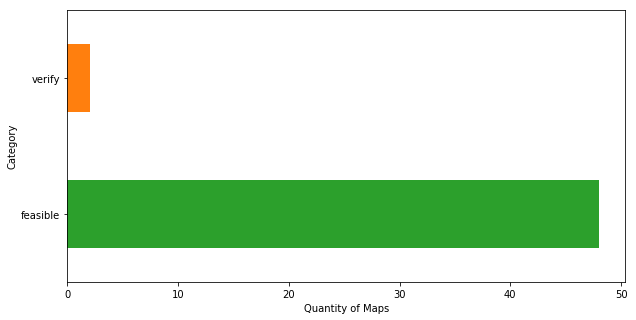

In [217]:
plt.figure()
# color=['C2','C0','C1']
ax = quantity_feasibility_df['best'].value_counts().plot.barh(figsize=(10,5), color=['C2','C1','C0'])
ax.set_xlabel('Quantity of Maps')
ax.set_ylabel('Category')
# # mode__exec_1_category_maps

In [184]:
quantity_feasibility_df

,qty_infeasible,qty_verify,qty_feasible,best
0,176,430,19,feasible
1,238,306,577,feasible
2,207,470,217,feasible
3,59,201,959,feasible
4,188,456,472,feasible
5,69,185,960,feasible
6,153,557,48,feasible
7,292,565,26,feasible
8,101,275,783,feasible
9,185,546,279,feasible


# Experiments

In [ ]:
# pathlist = PPath(MAPS_PATH).glob("**/*.sgl")

In [74]:
df = pd.read_csv(PATH + 'mode_R-PC_map_06_exec_1_history.csv')
df.sample(20)

,id,generation,parents,fitness,fitness_trace,birth_time,route
2311,2311,309,"[2294, 2300]",6354.999198,"[6346.589232438728, 0, 0.0, 0.0, 0, 8.40996584...",75.950817,"[[0, 0], [0.2359434943387727, 0.0], [-0.235675..."
2896,2896,365,[],9787.133014,"[9784.729154552515, 0, 0.0, 0.0, 0, 2.40385946...",89.593896,"[[0, 0], [-0.3643945450480037, 0.0], [-0.63513..."
5854,5854,706,"[5851, 5805]",6869.733589,"[6863.985689070365, 0, 0.0, 0.0, 0, 5.74789960...",172.069551,"[[0, 0], [-0.4445114371035477, 0.0], [-0.82497..."
1358,1358,196,"[1336, 1335]",6170.521878,"[6163.923133815588, 0, 0.0, 0.0, 0, 6.59874408...",48.095287,"[[0, 0], [0.2846354792975565, 0.0], [-0.478344..."
5656,5656,694,"[5633, 5630]",8878.458688,"[8876.333764488923, 0, 0.0, 0.0, 0, 2.12492313...",169.245522,"[[0, 0], [0.09131800664813558, 0.0], [-0.07424..."
3737,3737,464,"[3621, 3721]",11500.609989,"[11486.041319359067, 0, 0.0, 0.0, 0, 14.568669...",112.405445,"[[0, 0], [-0.005180705628877097, 0.0], [0.3487..."
2471,2471,322,"[2442, 2376]",5365.927553,"[5358.087656929436, 0, 0.0, 0.0, 0, 7.83989601...",79.276077,"[[0, 0], [-0.042813196846069795, 0.0], [-0.115..."
4320,4320,532,"[4317, 4274]",6774.017649,"[6768.298586204928, 0, 0.0, 0.0, 0, 5.71906322...",129.339287,"[[0, 0], [0.1565597621242243, 0.0], [0.4363199..."
5231,5231,635,"[5182, 5229]",11710.595213,"[11694.112973209018, 0, 0.0, 0.0, 0, 16.482239...",154.564830,"[[0, 0], [0.3393014156706056, 0.0], [1.3230610..."
3306,3306,417,"[3303, 3260]",7144.039596,"[7135.355900905629, 0, 0.0, 0.0, 0, 8.68369478...",101.844747,"[[0, 0], [-0.32086581745545156, 0.0], [-0.4911..."


<IPython.core.display.Javascript object>


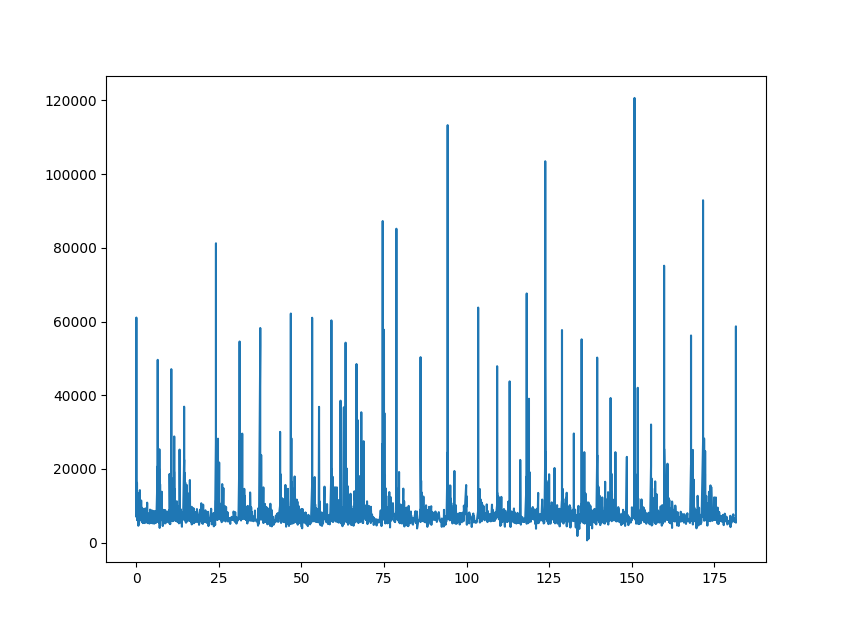

In [22]:
%matplotlib notebook
plt.plot(df['birth_time'], df['fitness'])

In [26]:
def plot(df):
    fig = go.Figure()
    for column in df.columns:
        fig.add_trace(go.Scatter(x=df.index, y=df[column], name=column))
    fig.show()

In [75]:
df_1 = df.groupby(['generation']).agg({'fitness': [np.min, np.mean]})
df_1.columns = df_1.columns.get_level_values(1)
plot(df_1)

In [81]:
df_1

,amin,mean
generation,,
0,7510.160952,19673.469321
1,5414.689320,9991.141876
2,6462.844577,9646.934103
3,6470.969970,7996.071790
4,5792.555590,8118.062521
5,4902.736613,7814.775926
6,4891.589426,7047.498322
7,4888.112063,4888.112063
8,5576.429779,7317.509722


In [76]:
# Gerar df de bests

ancestry = []

melhor = df.iloc[0]['fitness']
for i in range(df.shape[0]):
    if df.iloc[i]['fitness'] < melhor:
        melhor = df.iloc[i]['fitness']
        ancestry.append([df.iloc[i]['birth_time'], df.iloc[i]['generation'], melhor])

In [77]:
df_ancestry = pd.DataFrame(ancestry, columns=['birth_time', 'generation', 'fitness'])

In [78]:
df_ancestry

,birth_time,generation,fitness
0,0.001017,0,9567.413000
1,0.001303,0,8422.298632
2,0.001413,0,8305.032967
3,0.001608,0,7510.160952
4,0.163883,1,7060.645883
5,0.257070,1,5414.689320
6,1.290235,5,4902.736613
7,1.675214,6,4891.589426
8,1.868464,7,4888.112063
9,3.224975,12,4692.913173


In [79]:
plot(df_ancestry)

<IPython.core.display.Javascript object>


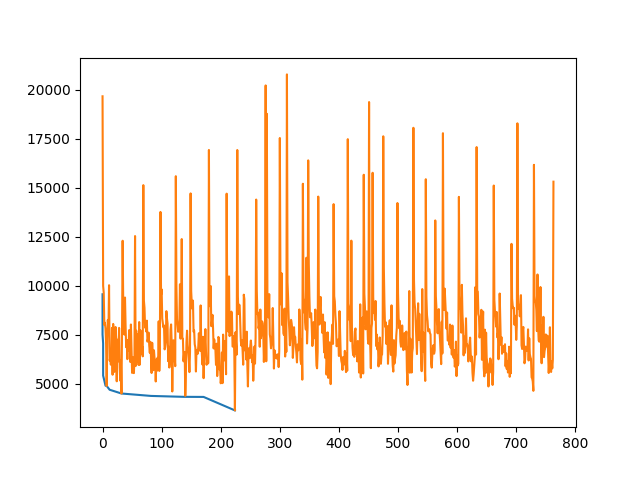

In [85]:
plt.plot(df_ancestry['generation'], df_ancestry['fitness'])
plt.plot(df_1['mean'])

In [93]:
df['fitness_trace'][0]

'[4369.399936510512, 36000, 0.0, 0.0, 0, 21.72831247029514]'

In [97]:
ast.literal_eval(df['fitness_trace'])

[4369.399936510512, 36000, 0.0, 0.0, 0, 21.72831247029514]

In [98]:
def function(x):
    x = ast.literal_eval(x)
    
    if x[1] > 4000:
        return 'infeasible'
    
    elif x[0] > 500:
        return 'verify'
    
    else:
        return 'feasible'

In [99]:
df['label'] = df['fitness_trace'].apply(lambda x: function(x))

In [105]:
{
    'qty_infeasible': df.loc[df['label']=='infeasible'].shape[0],
    'qty_verify': df.loc[df['label']=='verify'].shape[0],
    'qty_feasible': df.loc[df['label']=='feasible'].shape[0]
}

{'qty_infeasible': 278, 'qty_verify': 5948, 'qty_feasible': 0}

In [146]:
df[df.fitness == df.fitness.min()].iloc[0]['label']

'verify'